## INTRODUCTION

UTS MLOps

NIM: 2802555044

NAMA: Muhammad Reza Alghifari

JURUSAN: Artificial Intelligence

MATA KULIAH: MLOps

dataset: https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country/data

## OUTLINE
**i. IMPORT LIBRARY**

mengimport library yang dibutuhkan untuk preprocessing maupun modeling seperti sklearn maupun CNN

**ii. LOAD DATA**

mengambil data dari dataset

**iii. EXPLORATORY DATA ANALYSIS**

mencari insight dari dataset seperti penyebaran data maupun deteksi outlier

**iv. PREPROCESSING**

menyiapkan data dari mulai cleaning, future engineering, preparasi data

**v. BASELINE MODEL**

menggunakan catboost dan linear regresion sebagai baseline model untuk melihat apakah data tersebut linear atau non linear

**vi. MODEL COMPARATION**

mengcompare 3 model linear, model non linear dan model cnn sederhana untuk membuktikan apakah data linear atau non linear

**vii. FINAL MODEL**

menggunakan model terbarik hasil dari mengcompare 7 model sebelumnya lalu melakukan hyper parameter tuning dan stacking

## i. IMPORT LIBRARY

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [2]:
import math
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, MaxPooling1D, Flatten, concatenate
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

## ii. LOAD DATA

In [3]:
df = pd.read_csv("dataset.csv")
df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


In [4]:
print(f"DataFrame Shape: {df.shape}")

DataFrame Shape: (6704, 9)


## iii. EXPLORATORY DATA ANALYSIS (EDA)

### Basic Information

In [5]:
print("\n1. BASIC DATA INFORMATION")

print(f"DataFrame Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

print("\nData Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
df.info()


1. BASIC DATA INFORMATION
DataFrame Shape: (6704, 9)
Number of Features: 9
Number of Records: 6704

Data Types:
Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

First 5 rows:
   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0 

### Data Quality Check

In [6]:
print("\n\n2. DATA QUALITY CHECK")
print("\nMissing Values:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\nDuplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

print("\nStatistical Summary:")
print(df.describe())



2. DATA QUALITY CHECK

Missing Values:
                     Missing Count  Missing Percentage
Age                              2            0.029833
Gender                           2            0.029833
Education Level                  3            0.044749
Job Title                        2            0.029833
Years of Experience              3            0.044749
Salary                           5            0.074582

Duplicate Rows:
Number of duplicate rows: 0

Statistical Summary:
        Unnamed: 0          Age  Years of Experience         Salary
count  6704.000000  6702.000000          6701.000000    6699.000000
mean   3351.500000    33.620859             8.094687  115326.964771
std    1935.422435     7.614633             6.059003   52786.183911
min       0.000000    21.000000             0.000000     350.000000
25%    1675.750000    28.000000             3.000000   70000.000000
50%    3351.500000    32.000000             7.000000  115000.000000
75%    5027.250000    38.000000

### Univariate Analysis



3. UNIVARIATE ANALYSIS

3.1 Numerical Features Distribution


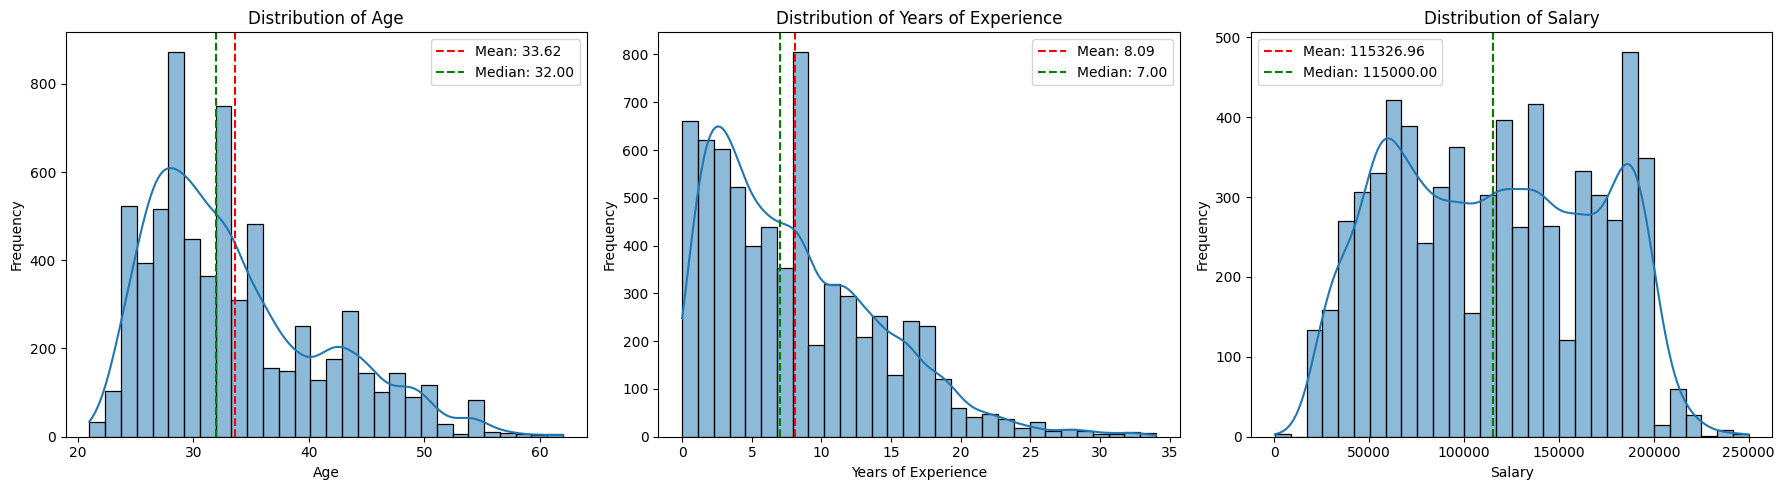

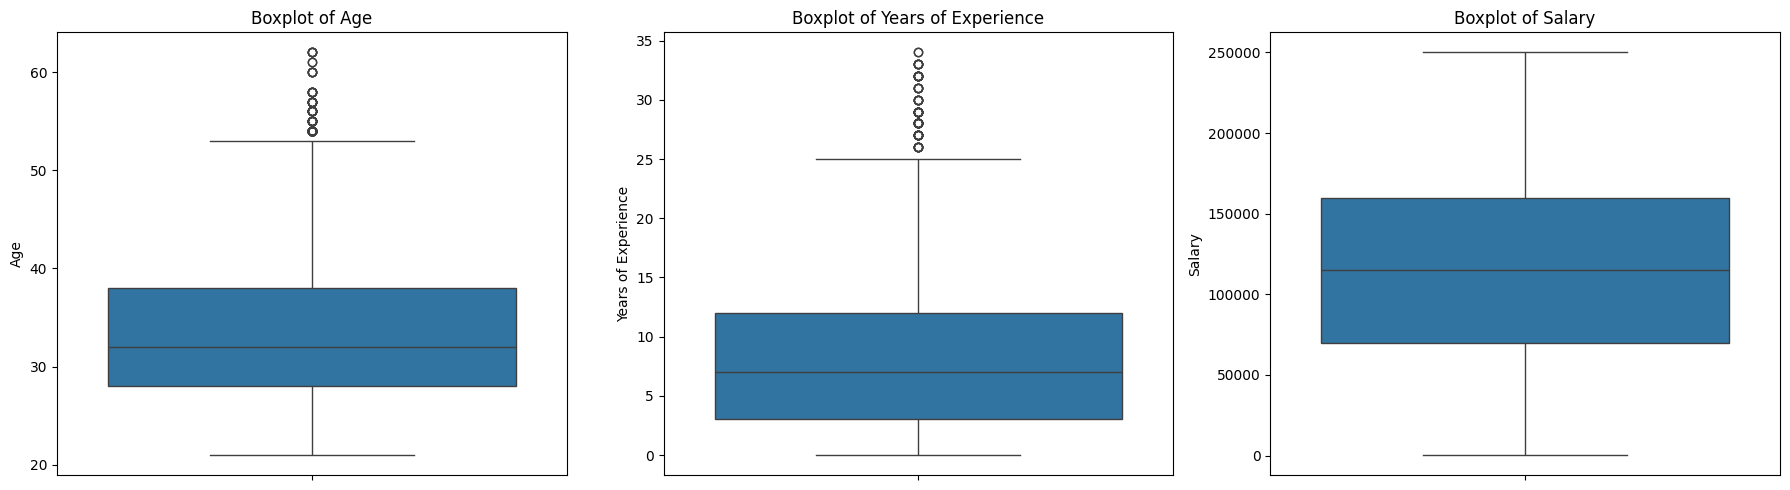


3.2 Categorical Features Distribution


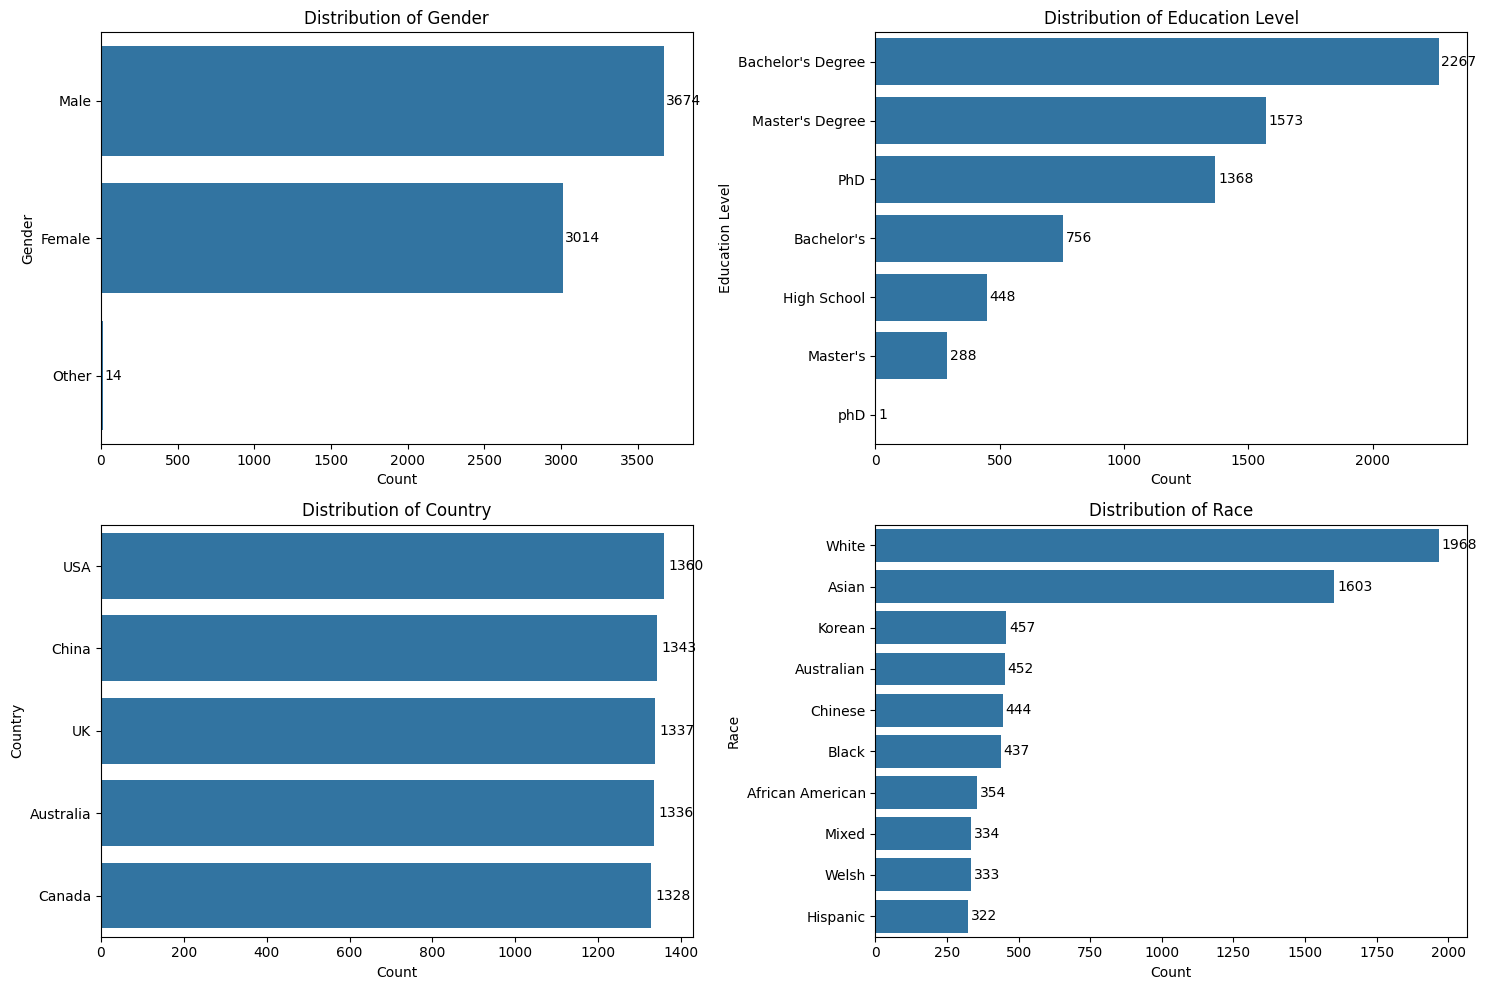

In [7]:
print("\n\n3. UNIVARIATE ANALYSIS")
print("\n3.1 Numerical Features Distribution")

numerical_features = ['Age', 'Years of Experience', 'Salary']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(numerical_features):
    # Histogram dengan KDE
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

    # Tambah line untuk mean dan median
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Boxplot untuk numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# 3.2 Categorical Features Distribution
print("\n3.2 Categorical Features Distribution")

categorical_features = ['Gender', 'Education Level', 'Country', 'Race']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Count plot
    value_counts = df[feature].value_counts()
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

    # Tambah nilai di bar
    for j, v in enumerate(value_counts.values):
        axes[i].text(v + 10, j, str(v), va='center')

plt.tight_layout()
plt.show()




Top 10 Job Titles:
Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          309
Marketing Manager            255
Senior Software Engineer     244
Back end Developer           244
Name: count, dtype: int64


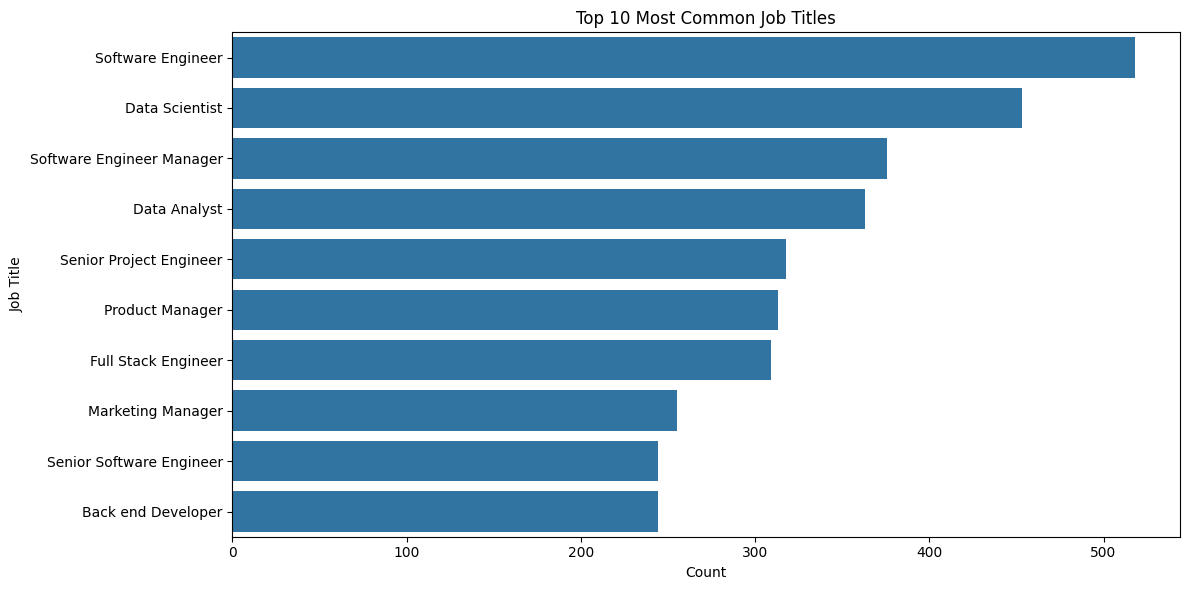

In [8]:
print("\nTop 10 Job Titles:")
print(df['Job Title'].value_counts().head(10))

plt.figure(figsize=(12, 6))
top_jobs = df['Job Title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

### Bivaritative Analysis



4. BIVARIATE ANALYSIS

4.1 Salary vs Categorical Features


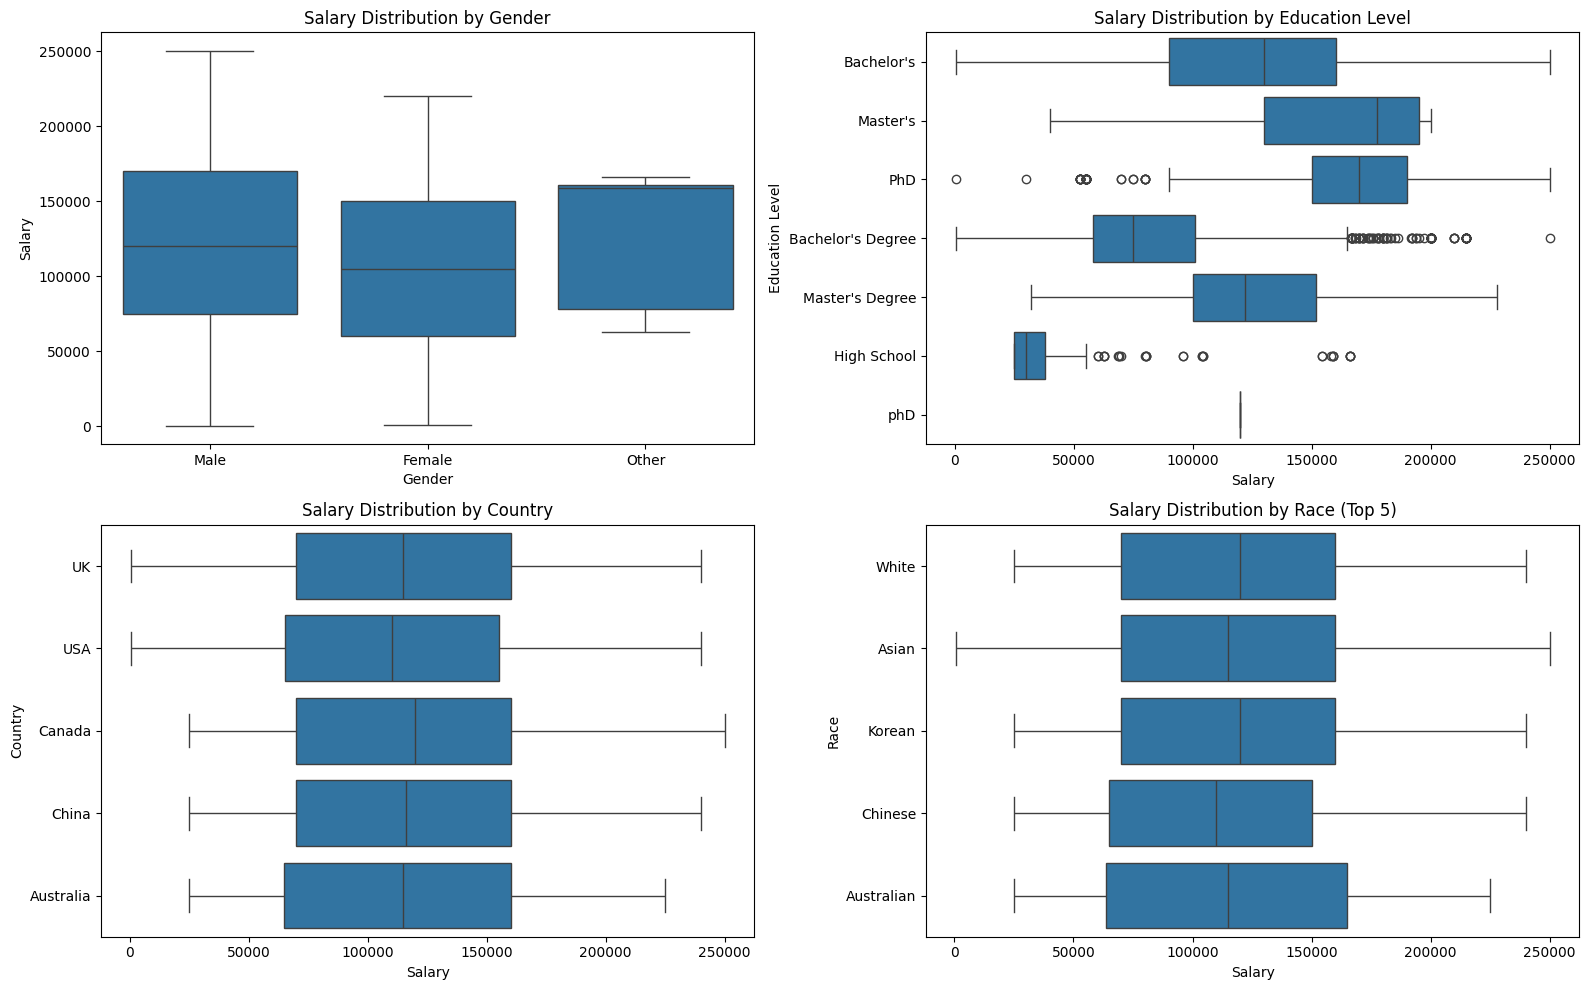

In [9]:
print("\n\n4. BIVARIATE ANALYSIS")


# 4.1 Salary vs Categorical Features
print("\n4.1 Salary vs Categorical Features")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gender vs Salary
sns.boxplot(data=df, x='Gender', y='Salary', ax=axes[0,0])
axes[0,0].set_title('Salary Distribution by Gender')

# Education Level vs Salary
sns.boxplot(data=df, x='Salary', y='Education Level', ax=axes[0,1])
axes[0,1].set_title('Salary Distribution by Education Level')

# Country vs Salary
sns.boxplot(data=df, x='Salary', y='Country', ax=axes[1,0])
axes[1,0].set_title('Salary Distribution by Country')

# Race vs Salary (ambil top 5 saja karena banyak kategori)
top_races = df['Race'].value_counts().head(5).index
race_filtered = df[df['Race'].isin(top_races)]
sns.boxplot(data=race_filtered, x='Salary', y='Race', ax=axes[1,1])
axes[1,1].set_title('Salary Distribution by Race (Top 5)')

plt.tight_layout()
plt.show()


4.2 Numerical Features vs Salary


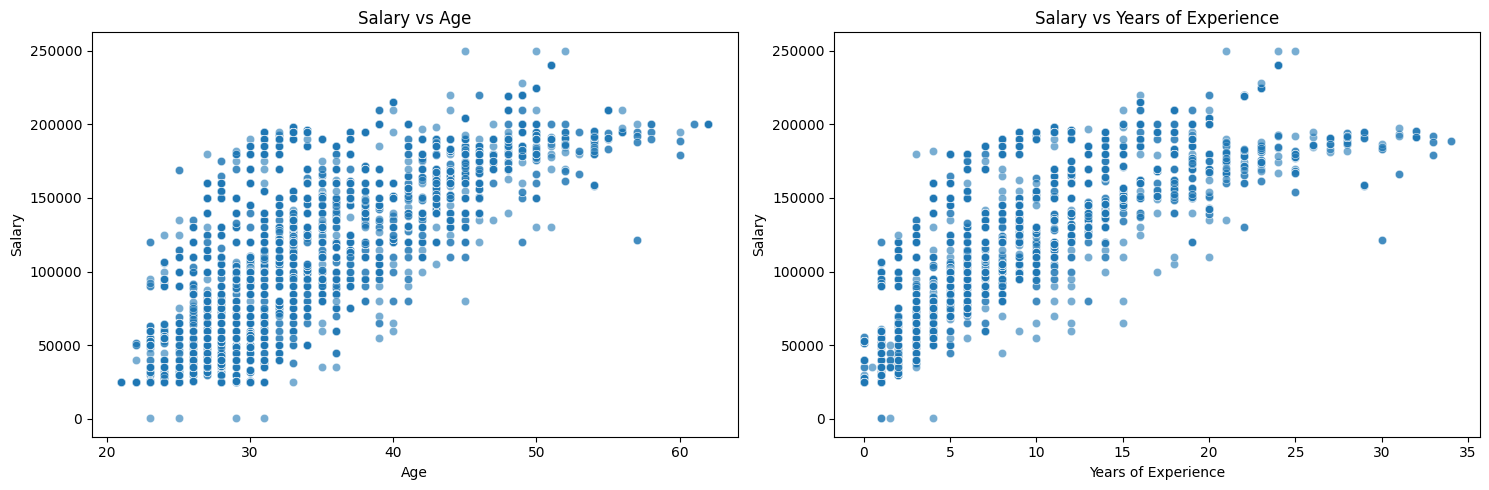

In [10]:
print("\n4.2 Numerical Features vs Salary")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age vs Salary
sns.scatterplot(data=df, x='Age', y='Salary', alpha=0.6, ax=axes[0])
axes[0].set_title('Salary vs Age')

# Years of Experience vs Salary
sns.scatterplot(data=df, x='Years of Experience', y='Salary', alpha=0.6, ax=axes[1])
axes[1].set_title('Salary vs Years of Experience')

plt.tight_layout()
plt.show()



4.3 Correlation Analysis


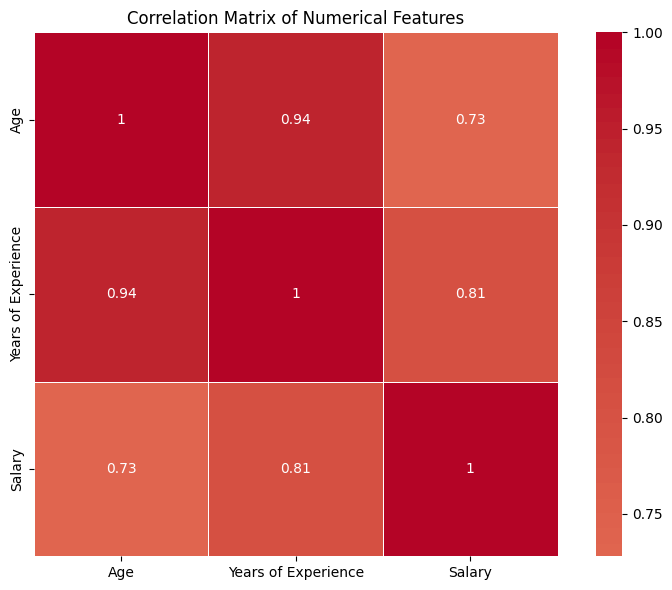


Correlation Matrix:
                          Age  Years of Experience    Salary
Age                  1.000000             0.937655  0.728053
Years of Experience  0.937655             1.000000  0.808969
Salary               0.728053             0.808969  1.000000


In [11]:
print("\n4.3 Correlation Analysis")

# Select only numerical features for correlation
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)


### Multivariate Analysis



5. MULTIVARIATE ANALYSIS


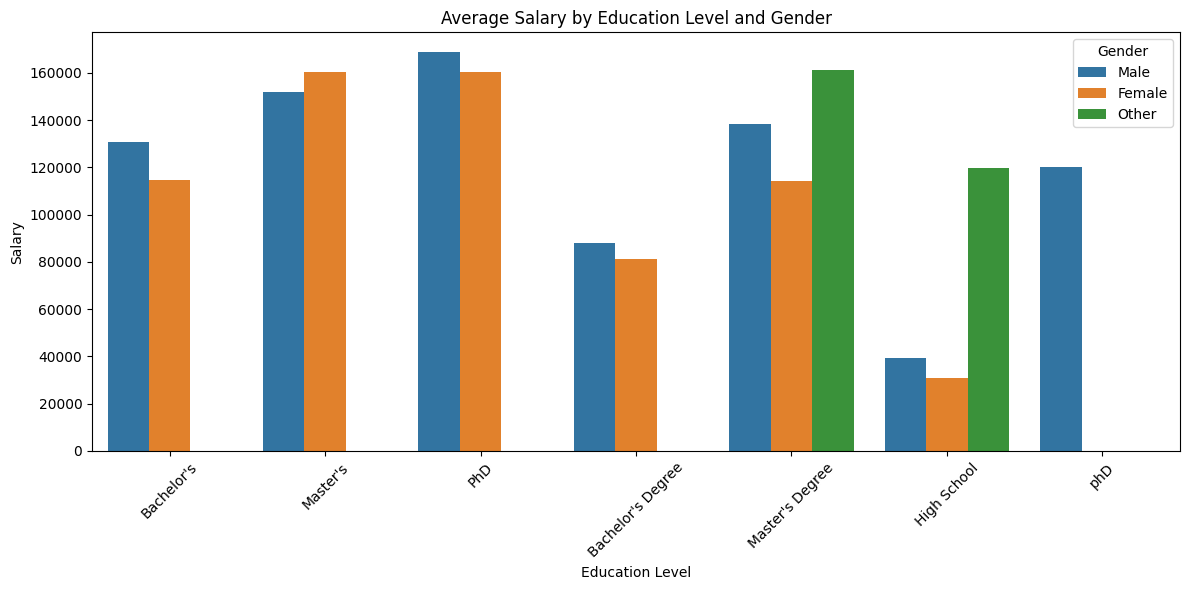


5.2 Pairplot of Numerical Features


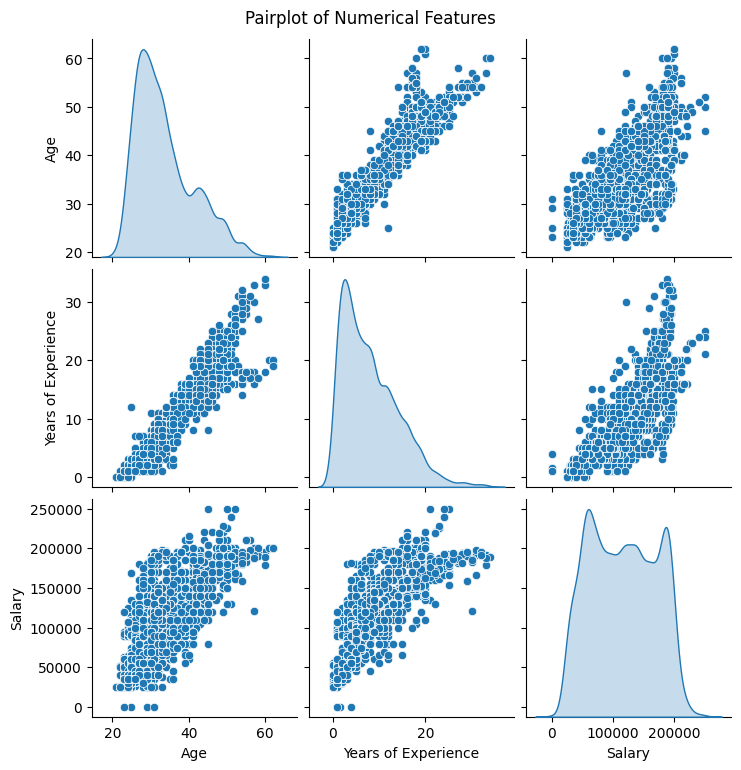

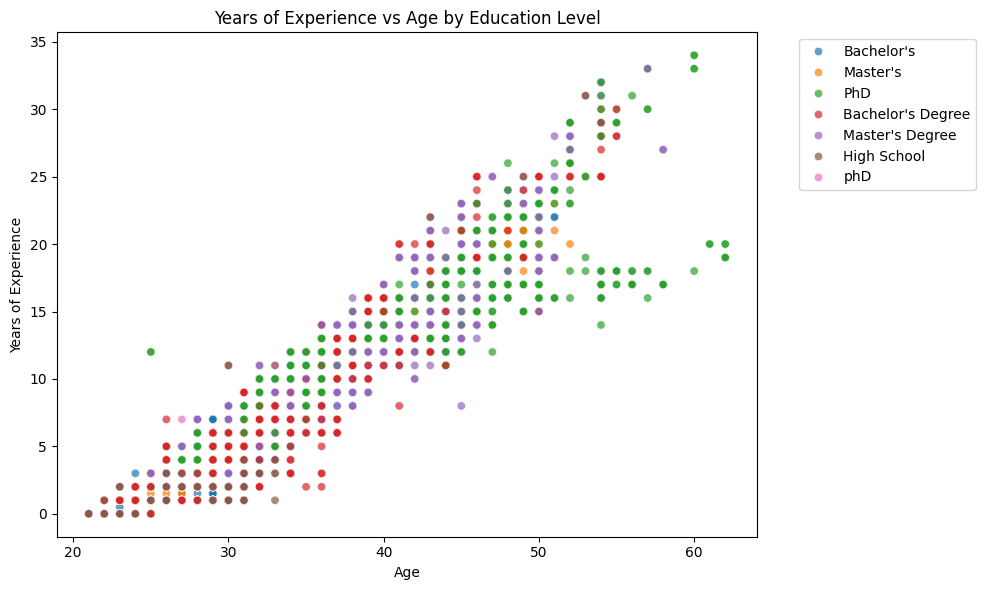

In [12]:
print("\n\n5. MULTIVARIATE ANALYSIS")

# 5.1 Salary by Education Level and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Education Level', y='Salary', hue='Gender', errorbar=None)
plt.title('Average Salary by Education Level and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.2 Pairplot untuk numerical features
print("\n5.2 Pairplot of Numerical Features")
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# 5.3 Experience vs Age colored by Education Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Years of Experience', hue='Education Level', alpha=0.7)
plt.title('Years of Experience vs Age by Education Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Outlier Detection

In [13]:
print("\n\n6. OUTLIER DETECTION")

# Deteksi outlier menggunakan IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outlier Detection using IQR method:")
for feature in numerical_features:
    outlier_count, lower, upper = detect_outliers_iqr(df, feature)
    print(f"{feature}: {outlier_count} outliers (Bounds: [{lower:.2f}, {upper:.2f}])")



6. OUTLIER DETECTION
Outlier Detection using IQR method:
Age: 123 outliers (Bounds: [13.00, 53.00])
Years of Experience: 75 outliers (Bounds: [-10.50, 25.50])
Salary: 0 outliers (Bounds: [-65000.00, 295000.00])


## iv. PREPROCESSING

### Data Cleaning

In [14]:
# Data cleaning
df.dropna(inplace=True)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Outlier removal
df = df[(df['Salary'] >= 20000) & (df['Salary'] <= 250000)]
print(f"Data shape after outlier removal: {df.shape}")

Data shape after outlier removal: (6694, 8)


### Feature Engineering

In [15]:
# Normalisasi Education Level
def normalize_edu(x):
    if isinstance(x, str):
        x_low = x.lower()
        if "bachelor" in x_low:
            return "Bachelor"
        elif "master" in x_low:
            return "Master"
        elif "phd" in x_low:
            return "PhD"
        elif "school" in x_low:
            return "High School"
    return x

df['Education Level'] = df['Education Level'].apply(normalize_edu)

# Buat fitur baru
print("Creating new features...")

# Age groups
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 25, 35, 45, 55, 100],
                         labels=['Under_25', '25-35', '35-45', '45-55', 'Over_55'])

# Experience levels
df['Experience_Level'] = pd.cut(df['Years of Experience'],
                                bins=[-1, 2, 5, 10, 50],
                                labels=['Junior', 'Mid', 'Senior', 'Expert'])

# Interaction features
df['Years_per_Age'] = df['Years of Experience'] / df['Age']
df['Edu_x_Experience'] = df['Education Level'].astype(str) + '_' + df['Experience_Level'].astype(str)

# Seniority score
edu_score = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['Edu_Score'] = df['Education Level'].map(edu_score).fillna(2)
df['Seniority_Score'] = df['Edu_Score'] * np.log1p(df['Years of Experience'])

print(f"Total features now: {df.shape[1]}")
print(f"New features: Age_Group, Experience_Level, Years_per_Age, Edu_x_Experience, Seniority_Score")

Creating new features...
Total features now: 14
New features: Age_Group, Experience_Level, Years_per_Age, Edu_x_Experience, Seniority_Score


### Prepare Data

In [16]:
# Define categorical and numerical features
categorical_features = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race',
                       'Age_Group', 'Experience_Level', 'Edu_x_Experience']
numerical_features = ['Age', 'Years of Experience', 'Years_per_Age', 'Edu_Score', 'Seniority_Score']

# Split data
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log transform target
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Prepare data for different models
# For CatBoost (handles categorical features natively)
X_train_catboost = X_train.copy()
X_test_catboost = X_test.copy()

# Convert categorical columns to string for CatBoost
for col in categorical_features:
    if col in X_train_catboost.columns:
        X_train_catboost[col] = X_train_catboost[col].astype(str)
        X_test_catboost[col] = X_test_catboost[col].astype(str)

# Get categorical indices for CatBoost
cat_features_indices = [X_train_catboost.columns.get_loc(col) for col in categorical_features if col in X_train_catboost.columns]

# For other models (use one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Train set: (5355, 13)
Test set: (1339, 13)


## v. BASELINE MODEL

In [17]:
models_results = {}

### Model for Linear Regresion

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train_log)
y_pred_linear_log = linear_model.predict(X_test_encoded)
y_pred_linear = np.exp(y_pred_linear_log)
y_test_original = np.exp(y_test_log)

In [19]:
#define error
rmse_linear = np.sqrt(mean_squared_error(y_test_original, y_pred_linear))
mae_linear = mean_absolute_error(y_test_original, y_pred_linear)
r2_linear = r2_score(y_test_original, y_pred_linear)

In [20]:
print(f"RMSE: ${rmse_linear:,.2f}")
print(f"MAE: ${mae_linear:,.2f}")
print(f"R²: {r2_linear:.4f}")

RMSE: $19,028.19
MAE: $13,312.40
R²: 0.8674


In [21]:
models_results['Linear Regression'] = {
    'RMSE': rmse_linear, 'MAE': mae_linear, 'R²': r2_linear,
    'predictions': y_pred_linear
}

### Model for Non Linear Regression

In [22]:
#use CatBoost
#default param
catboost_model = CatBoostRegressor(
    cat_features=cat_features_indices,
    random_seed=42,
    verbose=0,
    iterations=1000
)

In [23]:
catboost_model.fit(X_train_catboost, y_train_log, eval_set=(X_test_catboost, y_test_log))
y_pred_catboost_log = catboost_model.predict(X_test_catboost)
y_pred_catboost = np.exp(y_pred_catboost_log)

In [24]:
rmse_cb = np.sqrt(mean_squared_error(y_test_original, y_pred_catboost))
mae_cb = mean_absolute_error(y_test_original, y_pred_catboost)
r2_cb = r2_score(y_test_original, y_pred_catboost)

print(f"RMSE: ${rmse_cb:,.2f}")
print(f"MAE: ${mae_cb:,.2f}")
print(f"R²: {r2_cb:.4f}")

RMSE: $8,623.81
MAE: $5,125.02
R²: 0.9728


In [25]:
models_results['CatBoost'] = {
    'RMSE': rmse_cb, 'MAE': mae_cb, 'R²': r2_cb,
    'predictions': y_pred_catboost
}


### **Conclusion**

Model Non Linear Regresion seperi CatBoost memiliki error yang lebih sedikit sementara model linear regresion memiliki error yang lebih besar. Perbedaan error cukup signifikan yang bisa menjadi pertanda bahwa data tidak memiliki linear pada setiap fitur atau kita kenal non linear regresion.

**Linear Regresion:**

RMSE: $19,028.19

MAE: $13,312.40

R²: 0.8674


**CatBoost:**

RMSE: $8,623.81

MAE: $5,125.02


R²: 0.9728

**INSIGHT**: Melakukan pengecekan pada setiap model Linear dan Non Linear regresion sebagai perbandingan untuk membuktikan apakah dataset Linear/Non Linear

## vi. MODEL COMPARATION

### Non Linear Model Compare

In [26]:
#XGBoost
print("XGBoost:")
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model.fit(X_train_encoded, y_train_log, eval_set=[(X_test_encoded, y_test_log)], verbose=False)
y_pred_xgb_log = xgb_model.predict(X_test_encoded)
y_pred_xgb = np.exp(y_pred_xgb_log)

rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_original, y_pred_xgb)
r2_xgb = r2_score(y_test_original, y_pred_xgb)

print(f"RMSE: ${rmse_xgb:,.2f}")
print(f"MAE: ${mae_xgb:,.2f}")
print(f"R²: {r2_xgb:.4f}")

models_results['XGBoost'] = {
    'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R²': r2_xgb,
    'predictions': y_pred_xgb
}


XGBoost:
RMSE: $7,829.97
MAE: $4,025.15
R²: 0.9776


In [27]:

#Random Forest
print("RANDOM FOREST:")
rf_model = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train_encoded, y_train_log)
y_pred_rf_log = rf_model.predict(X_test_encoded)
y_pred_rf = np.exp(y_pred_rf_log)

rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf))
mae_rf = mean_absolute_error(y_test_original, y_pred_rf)
r2_rf = r2_score(y_test_original, y_pred_rf)

print(f"RMSE: ${rmse_rf:,.2f}")
print(f"MAE: ${mae_rf:,.2f}")
print(f"R²: {r2_rf:.4f}")

models_results['Random Forest'] = {
    'RMSE': rmse_rf, 'MAE': mae_rf, 'R²': r2_rf,
    'predictions': y_pred_rf
}

RANDOM FOREST:
RMSE: $8,426.79
MAE: $4,181.97
R²: 0.9740


In [28]:
print("SUPPORT VECTOR REGRESSION (SVR):")
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_encoded, y_train_log)
y_pred_svr_log = svr_model.predict(X_test_encoded)
y_pred_svr = np.exp(y_pred_svr_log)

rmse_svr = np.sqrt(mean_squared_error(y_test_original, y_pred_svr))
mae_svr = mean_absolute_error(y_test_original, y_pred_svr)
r2_svr = r2_score(y_test_original, y_pred_svr)

print(f"RMSE: ${rmse_svr:,.2f}")
print(f"MAE: ${mae_svr:,.2f}")
print(f"R²: {r2_svr:.4f}")

models_results['SVR'] = {
    'RMSE': rmse_svr, 'MAE': mae_svr, 'R²': r2_svr,
    'predictions': y_pred_svr
}

SUPPORT VECTOR REGRESSION (SVR):
RMSE: $13,445.92
MAE: $9,692.11
R²: 0.9338


### Linear Model Compare

In [29]:
#Ridge Regression
print("RIDGE REGRESSION:")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_encoded, y_train_log)
y_pred_ridge_log = ridge_model.predict(X_test_encoded)
y_pred_ridge = np.exp(y_pred_ridge_log)

rmse_ridge = np.sqrt(mean_squared_error(y_test_original, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test_original, y_pred_ridge)
r2_ridge = r2_score(y_test_original, y_pred_ridge)

print(f"RMSE: ${rmse_ridge:,.2f}")
print(f"MAE: ${mae_ridge:,.2f}")
print(f"R²: {r2_ridge:.4f}")

models_results['Ridge'] = {
    'RMSE': rmse_ridge, 'MAE': mae_ridge, 'R²': r2_ridge,
    'predictions': y_pred_ridge
}

RIDGE REGRESSION:
RMSE: $19,060.38
MAE: $13,310.12
R²: 0.8670


In [30]:
# Lasso Regression
print(" LASSO REGRESSION:")
lasso_model = Lasso(alpha=0.01, random_state=42, max_iter=5000)
lasso_model.fit(X_train_encoded, y_train_log)
y_pred_lasso_log = lasso_model.predict(X_test_encoded)
y_pred_lasso = np.exp(y_pred_lasso_log)

rmse_lasso = np.sqrt(mean_squared_error(y_test_original, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test_original, y_pred_lasso)
r2_lasso = r2_score(y_test_original, y_pred_lasso)

print(f"RMSE: ${rmse_lasso:,.2f}")
print(f"MAE: ${mae_lasso:,.2f}")
print(f"R²: {r2_lasso:.4f}")

models_results['Lasso'] = {
    'RMSE': rmse_lasso, 'MAE': mae_lasso, 'R²': r2_lasso,
    'predictions': y_pred_lasso
}

 LASSO REGRESSION:
RMSE: $27,548.51
MAE: $19,842.21
R²: 0.7222


In [31]:
#ElasticNet
print("ELASTICNET:")
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42, max_iter=5000)
elasticnet_model.fit(X_train_encoded, y_train_log)
y_pred_elasticnet_log = elasticnet_model.predict(X_test_encoded)
y_pred_elasticnet = np.exp(y_pred_elasticnet_log)

rmse_en = np.sqrt(mean_squared_error(y_test_original, y_pred_elasticnet))
mae_en = mean_absolute_error(y_test_original, y_pred_elasticnet)
r2_en = r2_score(y_test_original, y_pred_elasticnet)

print(f"RMSE: ${rmse_en:,.2f}")
print(f"MAE: ${mae_en:,.2f}")
print(f"R²: {r2_en:.4f}")

models_results['ElasticNet'] = {
    'RMSE': rmse_en, 'MAE': mae_en, 'R²': r2_en,
    'predictions': y_pred_elasticnet
}

ELASTICNET:
RMSE: $26,171.78
MAE: $19,134.66
R²: 0.7492


### Basic CNN Model

In [32]:

# Buat CNN Model + CNN HEAD

def create_cnn_model(input_shape):
    """Create CNN model with CNN head for tabular data"""
    # Input layer
    inputs = Input(shape=input_shape)

    # CNN Head
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Output layer
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

In [33]:
# For CNN - reshape data for 1D convolution
X_train_cnn = X_train_encoded.reshape(X_train_encoded.shape[0], X_train_encoded.shape[1], 1)
X_test_cnn = X_test_encoded.reshape(X_test_encoded.shape[0], X_test_encoded.shape[1], 1)


In [34]:
print("CNN WITH CNN HEAD:")
cnn_model = create_cnn_model((X_train_cnn.shape[1], 1))

# Train CNN
history = cnn_model.fit(
    X_train_cnn, y_train_log,
    validation_data=(X_test_cnn, y_test_log),
    epochs=100,
    batch_size=32,
    verbose=0
)

y_pred_cnn_log = cnn_model.predict(X_test_cnn).flatten()
y_pred_cnn = np.exp(y_pred_cnn_log)

rmse_cnn = np.sqrt(mean_squared_error(y_test_original, y_pred_cnn))
mae_cnn = mean_absolute_error(y_test_original, y_pred_cnn)
r2_cnn = r2_score(y_test_original, y_pred_cnn)

print(f"RMSE: ${rmse_cnn:,.2f}")
print(f"MAE: ${mae_cnn:,.2f}")
print(f"R²: {r2_cnn:.4f}")

models_results['CNN'] = {
    'RMSE': rmse_cnn, 'MAE': mae_cnn, 'R²': r2_cnn,
    'predictions': y_pred_cnn
}

CNN WITH CNN HEAD:
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
RMSE: $13,316.45
MAE: $10,469.89
R²: 0.9351


### Stacking Ensamble

In [35]:
print("TRAINING STACKING ENSEMBLES")


# Prepare base models
non_linear_models = [
    ('catboost', catboost_model),
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('svr', svr_model),
    ('cnn', cnn_model)
]

linear_models = [
    ('ridge', ridge_model),
    ('lasso', lasso_model),
    ('elasticnet', elasticnet_model)
]

all_models = non_linear_models + linear_models

def create_stacking_predictions(base_models_list, model_name):
    """Helper function to create stacking predictions"""
    base_predictions_train = []
    base_predictions_test = []

    for name, model in base_models_list:
        if name == 'catboost':
            pred_train = model.predict(X_train_catboost)
            pred_test = model.predict(X_test_catboost)
        elif name == 'cnn':
            pred_train = model.predict(X_train_cnn).flatten()
            pred_test = model.predict(X_test_cnn).flatten()
        else:
            pred_train = model.predict(X_train_encoded)
            pred_test = model.predict(X_test_encoded)

        base_predictions_train.append(pred_train)
        base_predictions_test.append(pred_test)

    # Stack predictions
    X_meta_train = np.column_stack(base_predictions_train)
    X_meta_test = np.column_stack(base_predictions_test)

    # Train meta-learner
    meta_learner = LinearRegression()
    meta_learner.fit(X_meta_train, y_train_log)

    # Make predictions
    y_pred_stacking_log = meta_learner.predict(X_meta_test)
    y_pred_stacking = np.exp(y_pred_stacking_log)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_stacking))
    mae = mean_absolute_error(y_test_original, y_pred_stacking)
    r2 = r2_score(y_test_original, y_pred_stacking)

    print(f"✓ {model_name} - MAE: ${mae:,.2f}, R²: {r2:.4f}")

    return {
        'RMSE': rmse, 'MAE': mae, 'R²': r2,
        'predictions': y_pred_stacking
    }

# Stacking Non-Linear Models Only
print("STACKING NON-LINEAR MODELS:")
models_results['Stacking_NonLinear'] = create_stacking_predictions(non_linear_models, "Non-Linear Only")

# Stacking Linear Models Only
print("\nSTACKING LINEAR MODELS:")
models_results['Stacking_Linear'] = create_stacking_predictions(linear_models, "Linear Only")

# Stacking All Models
print("\nSTACKING ALL MODELS:")
models_results['Stacking_All'] = create_stacking_predictions(all_models, "All Models")

TRAINING STACKING ENSEMBLES
STACKING NON-LINEAR MODELS:
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✓ Non-Linear Only - MAE: $3,993.58, R²: 0.9762

STACKING LINEAR MODELS:
✓ Linear Only - MAE: $13,300.52, R²: 0.8668

STACKING ALL MODELS:
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✓ All Models - MAE: $3,981.41, R²: 0.9764


### **Conclusion**

Disini Terlihat Non Linear Model jauh lebih baik dibandingkan dengan Model Linear. Ini membuktikan bahwa data pada dataset merupakan non linear sehingga perlu di deteksi menggunakan model non Linear


In [36]:
# Create results dataframe
results_comparison = pd.DataFrame({
    model: {k: v for k, v in metrics.items() if k != 'predictions'}
    for model, metrics in models_results.items()
}).T


CREATING VISUALIZATIONS - PROOF OF NON-LINEARITY
✓ Visualization saved as 'non_linearity_proof.png'


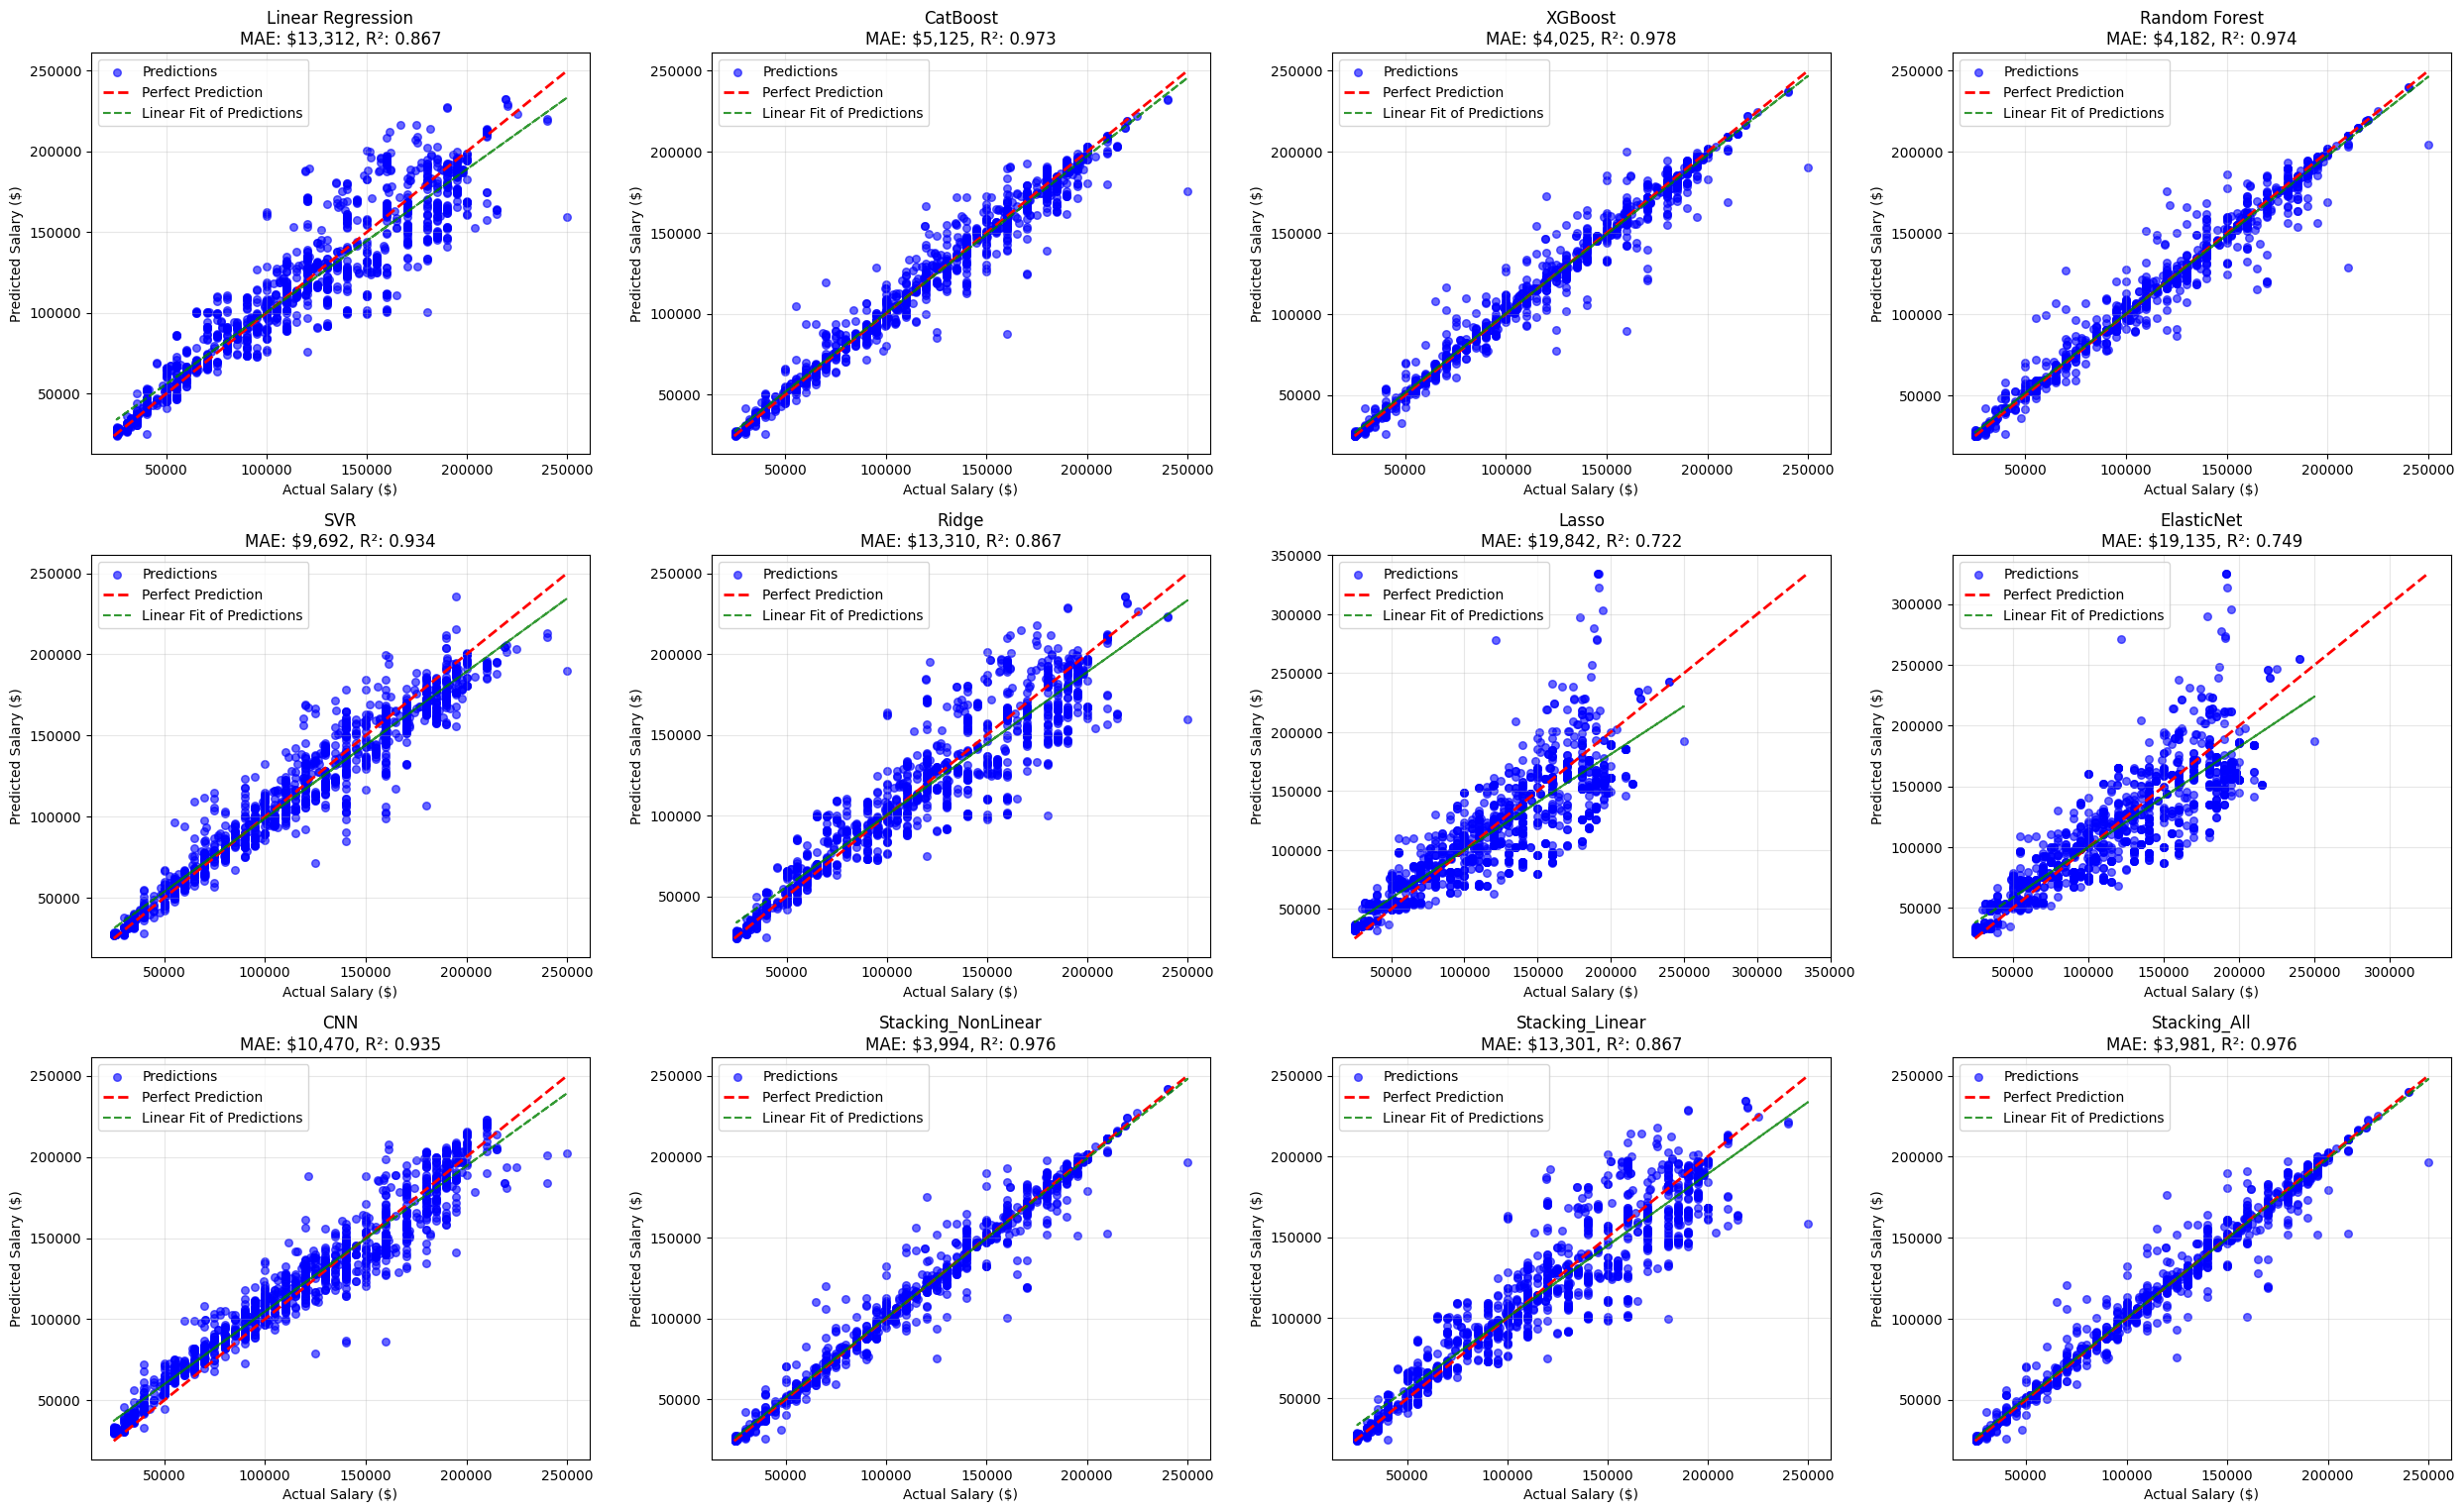

In [37]:
print("CREATING VISUALIZATIONS - PROOF OF NON-LINEARITY")
print("="*60)

# Create subplots for each model
fig = plt.figure(figsize=(25, 20))

# Define model groups for better organization
model_groups = {
    'Baseline': ['Linear Regression', 'CatBoost'],
    'Tree/Boosting': ['XGBoost', 'Random Forest', 'SVR'],
    'Linear Models': ['Ridge', 'Lasso', 'ElasticNet'],
    'Deep Learning': ['CNN'],
    'Stacking': ['Stacking_NonLinear', 'Stacking_Linear', 'Stacking_All']
}

# Plot each model
plot_idx = 1
for group_name, models_in_group in model_groups.items():
    for model_name in models_in_group:
        if model_name in models_results:
            ax = plt.subplot(4, 4, plot_idx)

            # Get predictions
            y_pred = models_results[model_name]['predictions']
            mae = models_results[model_name]['MAE']
            r2 = models_results[model_name]['R²']

            # Scatter plot
            ax.scatter(y_test_original, y_pred, alpha=0.6, s=30, color='blue', label='Predictions')

            # Perfect prediction line (red)
            min_val = min(y_test_original.min(), y_pred.min())
            max_val = max(y_test_original.max(), y_pred.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

            # Linear regression fit line (green) - to show non-linearity
            if len(y_test_original) > 1:
                z = np.polyfit(y_test_original, y_pred, 1)
                p = np.poly1d(z)
                ax.plot(y_test_original, p(y_test_original), "g--", alpha=0.8, linewidth=1.5,
                        label='Linear Fit of Predictions')

            ax.set_xlabel('Actual Salary ($)')
            ax.set_ylabel('Predicted Salary ($)')
            ax.set_title(f'{model_name}\nMAE: ${mae:,.0f}, R²: {r2:.3f}')
            ax.legend()
            ax.grid(True, alpha=0.3)

            plot_idx += 1

plt.tight_layout()
plt.savefig('non_linearity_proof.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved as 'non_linearity_proof.png'")

/tmp/ipython-input-3376199822.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_comparison.index, rotation=45, ha='right')
/tmp/ipython-input-3376199822.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(results_comparison.index, rotation=45, ha='right')
/tmp/ipython-input-3376199822.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(results_comparison.index, rotation=45, ha='right')


✓ Performance comparison saved as 'performance_comparison.png'


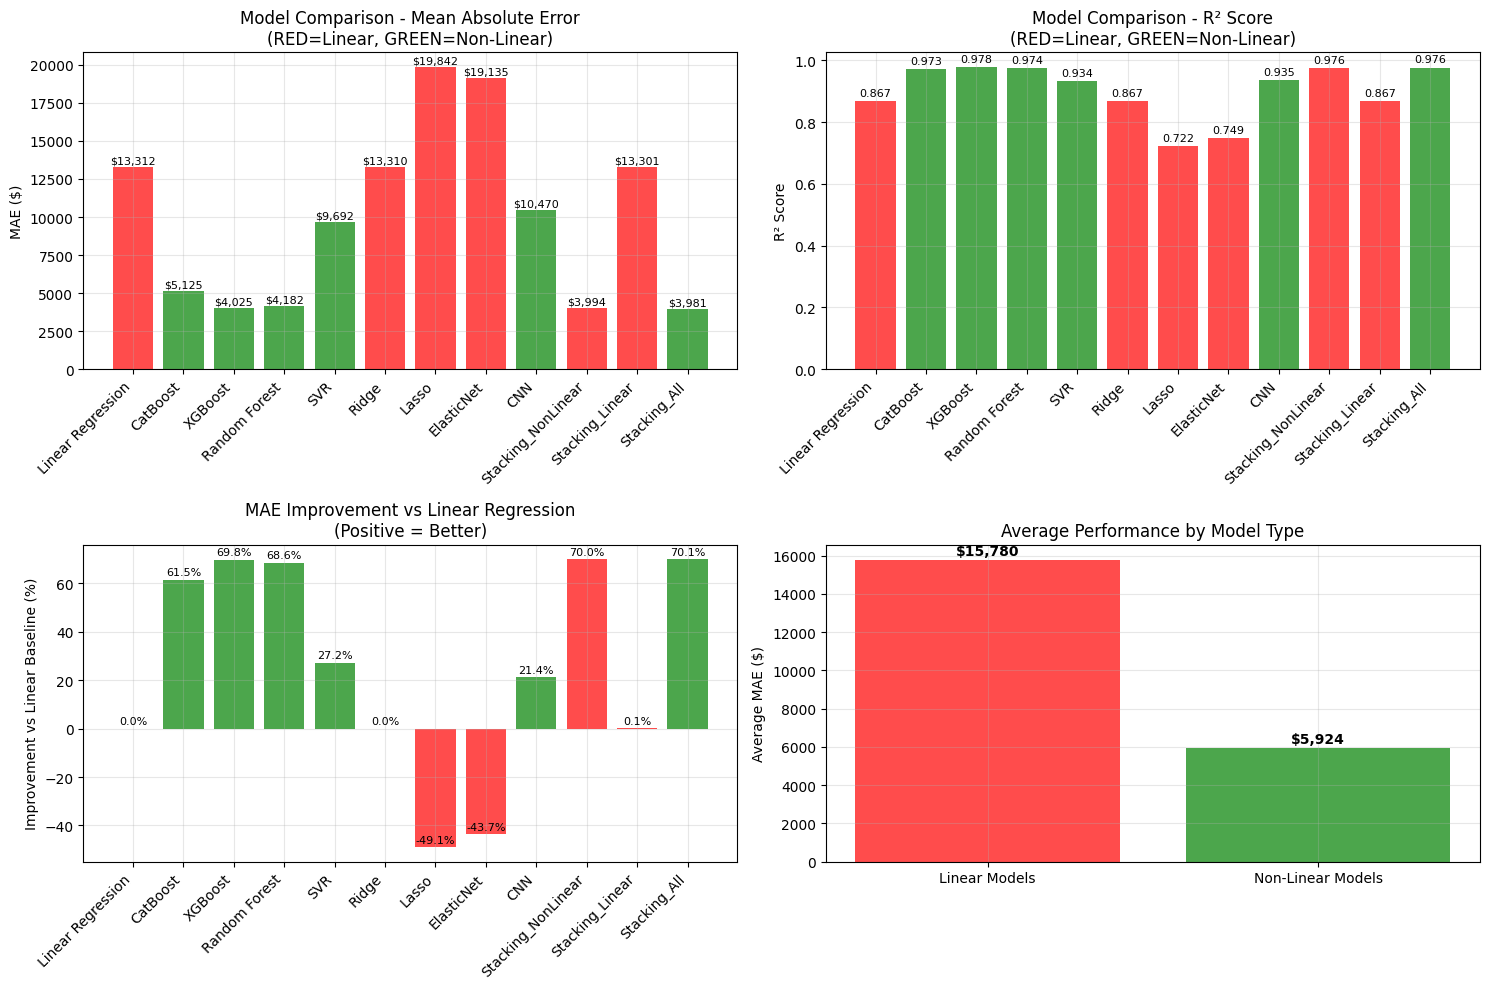

In [38]:
fig2 = plt.figure(figsize=(15, 10))

# MAE Comparison
ax1 = plt.subplot(2, 2, 1)
mae_values = [models_results[model]['MAE'] for model in results_comparison.index]
colors = ['red' if 'Linear' in model or model in ['Ridge','Lasso','ElasticNet'] else 'green' for model in results_comparison.index]

bars = ax1.bar(results_comparison.index, mae_values, color=colors, alpha=0.7)
ax1.set_ylabel('MAE ($)')
ax1.set_title('Model Comparison - Mean Absolute Error\n(RED=Linear, GREEN=Non-Linear)')
ax1.set_xticklabels(results_comparison.index, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, mae_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=8)

# R² Comparison
ax2 = plt.subplot(2, 2, 2)
r2_values = [models_results[model]['R²'] for model in results_comparison.index]
bars = ax2.bar(results_comparison.index, r2_values, color=colors, alpha=0.7)
ax2.set_ylabel('R² Score')
ax2.set_title('Model Comparison - R² Score\n(RED=Linear, GREEN=Non-Linear)')
ax2.set_xticklabels(results_comparison.index, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, r2_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# Improvement vs Linear Baseline
ax3 = plt.subplot(2, 2, 3)
baseline_mae = models_results['Linear Regression']['MAE']
improvement = [((baseline_mae - mae) / baseline_mae * 100) for mae in mae_values]

bars = ax3.bar(results_comparison.index, improvement, color=colors, alpha=0.7)
ax3.set_ylabel('Improvement vs Linear Baseline (%)')
ax3.set_title('MAE Improvement vs Linear Regression\n(Positive = Better)')
ax3.set_xticklabels(results_comparison.index, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, improvement):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

# Model Type Performance Summary
ax4 = plt.subplot(2, 2, 4)
model_types = {
    'Linear Models': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Stacking_Linear'],
    'Non-Linear Models': ['CatBoost', 'XGBoost', 'Random Forest', 'SVR', 'CNN', 'Stacking_NonLinear', 'Stacking_All']
}

avg_mae_by_type = {}
for type_name, models_in_type in model_types.items():
    maes = [models_results[model]['MAE'] for model in models_in_type if model in models_results]
    if maes:
        avg_mae_by_type[type_name] = np.mean(maes)

bars = ax4.bar(avg_mae_by_type.keys(), avg_mae_by_type.values(),
               color=['red', 'green'], alpha=0.7)
ax4.set_ylabel('Average MAE ($)')
ax4.set_title('Average Performance by Model Type')
ax4.grid(True, alpha=0.3)

for bar, value in zip(bars, avg_mae_by_type.values()):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Performance comparison saved as 'performance_comparison.png'")

plt.show()


/tmp/ipython-input-3700753652.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_comparison.index, rotation=45, ha='right')
/tmp/ipython-input-3700753652.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(results_comparison.index, rotation=45, ha='right')
/tmp/ipython-input-3700753652.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(results_comparison.index, rotation=45, ha='right')


Performance comparison saved as 'performance_comparison.png'


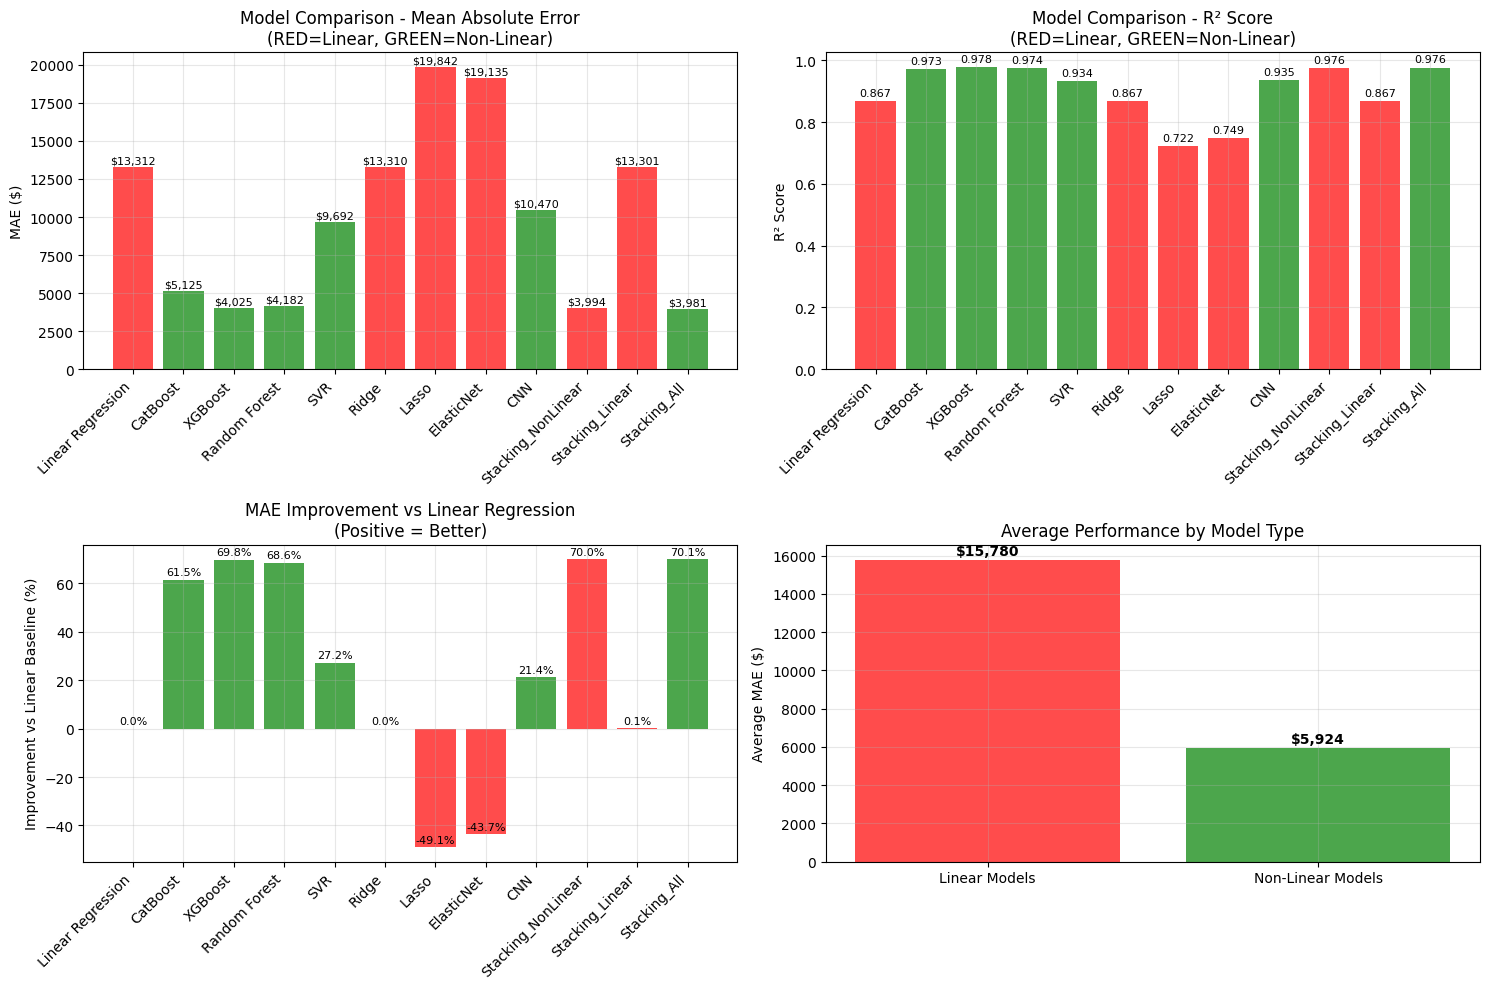

In [39]:
fig2 = plt.figure(figsize=(15, 10))

# MAE Comparison
ax1 = plt.subplot(2, 2, 1)
mae_values = [models_results[model]['MAE'] for model in results_comparison.index]
colors = ['red' if 'Linear' in model or model in ['Ridge','Lasso','ElasticNet'] else 'green' for model in results_comparison.index]

bars = ax1.bar(results_comparison.index, mae_values, color=colors, alpha=0.7)
ax1.set_ylabel('MAE ($)')
ax1.set_title('Model Comparison - Mean Absolute Error\n(RED=Linear, GREEN=Non-Linear)')
ax1.set_xticklabels(results_comparison.index, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, mae_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=8)

# R² Comparison
ax2 = plt.subplot(2, 2, 2)
r2_values = [models_results[model]['R²'] for model in results_comparison.index]
bars = ax2.bar(results_comparison.index, r2_values, color=colors, alpha=0.7)
ax2.set_ylabel('R² Score')
ax2.set_title('Model Comparison - R² Score\n(RED=Linear, GREEN=Non-Linear)')
ax2.set_xticklabels(results_comparison.index, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, r2_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# Improvement vs Linear Baseline
ax3 = plt.subplot(2, 2, 3)
baseline_mae = models_results['Linear Regression']['MAE']
improvement = [((baseline_mae - mae) / baseline_mae * 100) for mae in mae_values]

bars = ax3.bar(results_comparison.index, improvement, color=colors, alpha=0.7)
ax3.set_ylabel('Improvement vs Linear Baseline (%)')
ax3.set_title('MAE Improvement vs Linear Regression\n(Positive = Better)')
ax3.set_xticklabels(results_comparison.index, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, improvement):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

# Model Type Performance Summary
ax4 = plt.subplot(2, 2, 4)
model_types = {
    'Linear Models': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Stacking_Linear'],
    'Non-Linear Models': ['CatBoost', 'XGBoost', 'Random Forest', 'SVR', 'CNN', 'Stacking_NonLinear', 'Stacking_All']
}

avg_mae_by_type = {}
for type_name, models_in_type in model_types.items():
    maes = [models_results[model]['MAE'] for model in models_in_type if model in models_results]
    if maes:
        avg_mae_by_type[type_name] = np.mean(maes)

bars = ax4.bar(avg_mae_by_type.keys(), avg_mae_by_type.values(),
               color=['red', 'green'], alpha=0.7)
ax4.set_ylabel('Average MAE ($)')
ax4.set_title('Average Performance by Model Type')
ax4.grid(True, alpha=0.3)

for bar, value in zip(bars, avg_mae_by_type.values()):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'${value:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
print("Performance comparison saved as 'performance_comparison.png'")

plt.show()

In [40]:
print("FINAL CONCLUSIONS - PROOF OF NON-LINEARITY")

# Calculate average performance by type
linear_maes = [models_results[model]['MAE'] for model in
              ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Stacking_Linear']
              if model in models_results]
non_linear_maes = [models_results[model]['MAE'] for model in
                  ['CatBoost', 'XGBoost', 'Random Forest', 'SVR', 'CNN', 'Stacking_NonLinear', 'Stacking_All']
                  if model in models_results]

avg_linear_mae = np.mean(linear_maes)
avg_non_linear_mae = np.mean(non_linear_maes)
improvement_pct = ((avg_linear_mae - avg_non_linear_mae) / avg_linear_mae) * 100

print(f"   AVERAGE MAE BY MODEL TYPE:")
print(f"   Linear Models:     ${avg_linear_mae:,.2f}")
print(f"   Non-Linear Models: ${avg_non_linear_mae:,.2f}")
print(f"   IMPROVEMENT:       {improvement_pct:.1f}% better with Non-Linear models!")
print(f"   This clearly proves NON-LINEAR relationship in the data!")

# Find best model
best_model = min(models_results.items(), key=lambda x: x[1]['MAE'])
print(f"\n🏆 BEST MODEL: {best_model[0]}")
print(f"   MAE: ${best_model[1]['MAE']:,.2f}")
print(f"   R²:  {best_model[1]['R²']:.4f}")


FINAL CONCLUSIONS - PROOF OF NON-LINEARITY
   AVERAGE MAE BY MODEL TYPE:
   Linear Models:     $15,779.98
   Non-Linear Models: $5,924.16
   IMPROVEMENT:       62.5% better with Non-Linear models!
   This clearly proves NON-LINEAR relationship in the data!

🏆 BEST MODEL: Stacking_All
   MAE: $3,981.41
   R²:  0.9764


## vii. Final Model

In [41]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import StackingRegressor
import joblib
import json

In [42]:
#tambahkan gbr
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

In [43]:
#siapkan 5 model terbaik
best_non_linear_models = {
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'RandomForest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)  # Adding one more
}

### Hyper Parameter

In [44]:
# Hyperparameter tuning for each model
print("PERFORMING HYPERPARAMETER TUNING...")

# 1. XGBoost Tuning
print("1. Tuning XGBoost...")
xgb_params = {
    'n_estimators': [500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_params,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)
xgb_grid.fit(X_train_encoded, y_train_log)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGBoost params: {xgb_grid.best_params_}")
print(f"Best XGBoost MAE: {-xgb_grid.best_score_:.4f}")

PERFORMING HYPERPARAMETER TUNING...
1. Tuning XGBoost...
Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 1.0}
Best XGBoost MAE: 0.0337


In [45]:
# 2. CatBoost Tuning
print("2. Tuning CatBoost...")
catboost_params = {
    'iterations': [800, 1000, 1200],
    'learning_rate': [0.03, 0.05, 0.07],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5]
}

catboost_grid = GridSearchCV(
    CatBoostRegressor(random_state=42, verbose=0),
    catboost_params,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)
catboost_grid.fit(X_train_catboost, y_train_log, cat_features=cat_features_indices)
best_catboost = catboost_grid.best_estimator_
print(f"Best CatBoost params: {catboost_grid.best_params_}")
print(f"Best CatBoost MAE: {-catboost_grid.best_score_:.4f}")

2. Tuning CatBoost...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best CatBoost params: {'depth': 10, 'iterations': 1200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Best CatBoost MAE: 0.0457


In [46]:
# 3. Random Forest Tuning
print("3. Tuning Random Forest...")
rf_params = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)
rf_grid.fit(X_train_encoded, y_train_log)
best_rf = rf_grid.best_estimator_
print(f"Best Random Forest params: {rf_grid.best_params_}")
print(f"Best Random Forest MAE: {-rf_grid.best_score_:.4f}")


3. Tuning Random Forest...
Best Random Forest params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
Best Random Forest MAE: 0.0381


In [47]:
# 4. SVR Tuning
print("4. Tuning SVR...")
svr_params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear']
}

svr_grid = GridSearchCV(
    SVR(),
    svr_params,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)
svr_grid.fit(X_train_encoded, y_train_log)
best_svr = svr_grid.best_estimator_
print(f"Best SVR params: {svr_grid.best_params_}")
print(f"Best SVR MAE: {-svr_grid.best_score_:.4f}")


4. Tuning SVR...
Best SVR params: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best SVR MAE: 0.0614


In [48]:
# 5. Gradient Boosting Tuning
print("5. Tuning Gradient Boosting...")
gb_params = {
    'n_estimators': [500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)
gb_grid.fit(X_train_encoded, y_train_log)
best_gb = gb_grid.best_estimator_
print(f"✓ Best Gradient Boosting params: {gb_grid.best_params_}")
print(f"✓ Best Gradient Boosting MAE: {-gb_grid.best_score_:.4f}")


5. Tuning Gradient Boosting...
✓ Best Gradient Boosting params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.9}
✓ Best Gradient Boosting MAE: 0.0360


### Stacking Using Kfold

In [49]:

print("CREATING STACKING ENSEMBLE WITH K-FOLD")

# Define base estimators for stacking
base_estimators = [
    ('xgb', best_xgb),
    ('catboost', best_catboost),
    ('random_forest', best_rf),
    ('svr', best_svr),
    ('gradient_boosting', best_gb)
]

# Create stacking ensemble with KFold
stacking_final = StackingRegressor(
    estimators=base_estimators,
    final_estimator=LinearRegression(),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    passthrough=True,
    n_jobs=-1
)

# Train stacking model
print("Training final stacking ensemble with 5-fold CV...")
stacking_final.fit(X_train_encoded, y_train_log)

# Make predictions with stacking
y_pred_stacking_final_log = stacking_final.predict(X_test_encoded)
y_pred_stacking_final = np.exp(y_pred_stacking_final_log)

# Calculate metrics for stacking
rmse_stacking_final = np.sqrt(mean_squared_error(y_test_original, y_pred_stacking_final))
mae_stacking_final = mean_absolute_error(y_test_original, y_pred_stacking_final)
r2_stacking_final = r2_score(y_test_original, y_pred_stacking_final)

print(f"\n🎯 FINAL STACKING ENSEMBLE PERFORMANCE:")
print(f"✓ RMSE: ${rmse_stacking_final:,.2f}")
print(f"✓ MAE: ${mae_stacking_final:,.2f}")
print(f"✓ R²: {r2_stacking_final:.4f}")

CREATING STACKING ENSEMBLE WITH K-FOLD
Training final stacking ensemble with 5-fold CV...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



🎯 FINAL STACKING ENSEMBLE PERFORMANCE:
✓ RMSE: $7,031.73
✓ MAE: $3,677.30
✓ R²: 0.9819


### Individual Tune Performance

In [61]:
print("INDIVIDUAL TUNED MODELS PERFORMANCE")


final_models = {
    'XGBoost_Tuned': best_xgb,
    'CatBoost_Tuned': best_catboost,
    'RandomForest_Tuned': best_rf,
    'SVR_Tuned': best_svr,
    'GradientBoosting_Tuned': best_gb,
    'Stacking_Final': stacking_final
}

final_results = {}

for name, model in final_models.items():
    if name == 'CatBoost_Tuned':
        y_pred_log = model.predict(X_test_catboost)
    else:
        y_pred_log = model.predict(X_test_encoded)

    y_pred = np.exp(y_pred_log)

    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    mae = mean_absolute_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)

    final_results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'predictions': y_pred
    }

    print(f"\n{name}:")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  R²: {r2:.4f}")

INDIVIDUAL TUNED MODELS PERFORMANCE

XGBoost_Tuned:
  RMSE: $7,132.35
  MAE: $3,146.75
  R²: 0.9814

CatBoost_Tuned:
  RMSE: $7,818.94
  MAE: $4,161.43
  R²: 0.9776

RandomForest_Tuned:
  RMSE: $7,894.92
  MAE: $3,418.32
  R²: 0.9772

SVR_Tuned:
  RMSE: $10,900.45
  MAE: $6,151.08
  R²: 0.9565

GradientBoosting_Tuned:
  RMSE: $7,093.29
  MAE: $3,462.58
  R²: 0.9816

Stacking_Final:
  RMSE: $7,031.73
  MAE: $3,677.30
  R²: 0.9819


### Error Analysis and Model Resistance

In [57]:
# Detailed error analysis
print("\n📊 DETAILED ERROR ANALYSIS:")
best_predictions = final_results['Stacking_Final']['predictions']
errors = y_test_original - best_predictions
absolute_errors = np.abs(errors)

print(f"Mean Absolute Error: ${absolute_errors.mean():,.2f}")
print(f"Median Absolute Error: ${np.median(absolute_errors):,.2f}")
print(f"Max Absolute Error: ${absolute_errors.max():,.2f}")
print(f"Min Absolute Error: ${absolute_errors.min():,.2f}")
print(f"Std of Absolute Error: ${absolute_errors.std():,.2f}")

# Error distribution
error_percentage = (absolute_errors / y_test_original) * 100
print(f"\nError Percentage Statistics:")
print(f"Mean Error %: {error_percentage.mean():.2f}%")
print(f"Median Error %: {np.median(error_percentage):.2f}%")
print(f"90th Percentile Error %: {np.percentile(error_percentage, 90):.2f}%")



📊 DETAILED ERROR ANALYSIS:
Mean Absolute Error: $3,677.30
Median Absolute Error: $1,669.81
Max Absolute Error: $70,723.22
Min Absolute Error: $1.34
Std of Absolute Error: $5,995.79

Error Percentage Statistics:
Mean Error %: 3.48%
Median Error %: 1.56%
90th Percentile Error %: 8.60%


In [62]:
# Save models
print("SAVING MODELS")

# 1. Save preprocessing pipeline
joblib.dump(preprocessor, 'salary_preprocessor.pkl')
print("Preprocessor saved as 'salary_preprocessor.pkl'")

# 2. Save individual tuned models
model_files = {}
for name, model in final_models.items():
    if name == 'CatBoost_Tuned':
        model.save_model('catboost_tuned_model.cbm')
        model_files[name] = 'catboost_tuned_model.cbm'
    else:
        filename = f"{name.lower().replace(' ', '_')}.pkl"
        joblib.dump(model, filename)
        model_files[name] = filename
    print(f"{name} saved")

# Define feature_names sebelum digunakan
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# 3. Save model metadata
# Convert numpy values to Python native types for JSON serialization
serializable_results = {}
for model_name, metrics in final_results.items():
    serializable_results[model_name] = {
        'RMSE': float(metrics['RMSE']),
        'MAE': float(metrics['MAE']),
        'R²': float(metrics['R²'])
        # Remove 'predictions' because it contains numpy arrays
    }

metadata = {
    'model_files': model_files,
    'feature_names': {
        'categorical': categorical_features,
        'numerical': numerical_features,
        'all_encoded': feature_names.tolist() if hasattr(feature_names, 'tolist') else list(feature_names)
    },
    'performance': serializable_results,
    'preprocessor_file': 'salary_preprocessor.pkl'
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print("Model metadata saved as 'model_metadata.json'")

# 4. Save predictions and actual values for analysis
results_df = pd.DataFrame({
    'Actual_Salary': y_test_original,
    'Predicted_Salary': best_predictions,
    'Absolute_Error': absolute_errors,
    'Error_Percentage': error_percentage
})
results_df.to_csv('final_predictions_analysis.csv', index=False)
print("Predictions analysis saved as 'final_predictions_analysis.csv'")

SAVING MODELS
Preprocessor saved as 'salary_preprocessor.pkl'
XGBoost_Tuned saved
CatBoost_Tuned saved
RandomForest_Tuned saved
SVR_Tuned saved
GradientBoosting_Tuned saved
Stacking_Final saved
Model metadata saved as 'model_metadata.json'
Predictions analysis saved as 'final_predictions_analysis.csv'


In [64]:
import zipfile
import os

# List of files to be zipped
files_to_zip = [
    'salary_preprocessor.pkl',
    'xgboost_tuned.pkl',
    'catboost_tuned_model.cbm',
    'randomforest_tuned.pkl',
    'svr_tuned.pkl',
    'gradientboosting_tuned.pkl',
    'stacking_final.pkl',
    'model_metadata.json',
    'final_predictions_analysis.csv',
    'non_linearity_proof.png',
    'performance_comparison.png'
]

zip_file_name = 'salary_prediction_models_and_results.zip'

with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for file in files_to_zip:
        if os.path.exists(file):
            zipf.write(file)
            print(f'Added {file} to {zip_file_name}')
        else:
            print(f'Warning: {file} not found and skipped.')

print(f'All specified files have been zipped into {zip_file_name}')

Added salary_preprocessor.pkl to salary_prediction_models_and_results.zip
Added xgboost_tuned.pkl to salary_prediction_models_and_results.zip
Added catboost_tuned_model.cbm to salary_prediction_models_and_results.zip
Added randomforest_tuned.pkl to salary_prediction_models_and_results.zip
Added svr_tuned.pkl to salary_prediction_models_and_results.zip
Added gradientboosting_tuned.pkl to salary_prediction_models_and_results.zip
Added stacking_final.pkl to salary_prediction_models_and_results.zip
Added model_metadata.json to salary_prediction_models_and_results.zip
Added final_predictions_analysis.csv to salary_prediction_models_and_results.zip
Added non_linearity_proof.png to salary_prediction_models_and_results.zip
Added performance_comparison.png to salary_prediction_models_and_results.zip
All specified files have been zipped into salary_prediction_models_and_results.zip


In [65]:
from IPython.display import FileLink

zip_file_name = 'salary_prediction_models_and_results.zip'
if os.path.exists(zip_file_name):
    display(FileLink(zip_file_name))
else:
    print(f"File '{zip_file_name}' not found. Please ensure it was created successfully.")

/content/salary_prediction_models_and_results.zip

Final Stacking Model Performance on Training Set:
  RMSE: $4,348.88
  MAE: $2,190.59
  R²: 0.9932


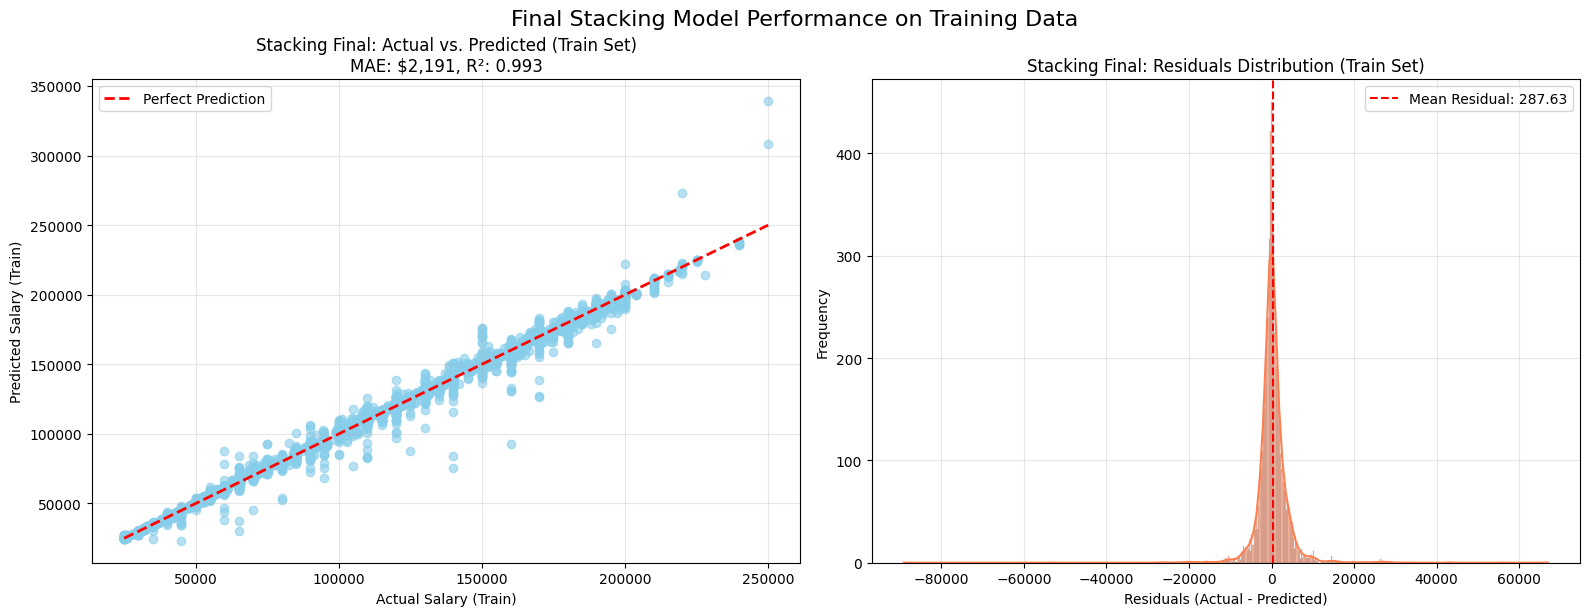

Training performance plot saved as 'stacking_final_train_performance.png'


<Figure size 640x480 with 0 Axes>

In [66]:
# Get predictions on the training set for the final stacking model
y_pred_stacking_final_train_log = stacking_final.predict(X_train_encoded)
y_pred_stacking_final_train = np.exp(y_pred_stacking_final_train_log)

# Get the original scale of the training target variable
y_train_original = np.exp(y_train_log)

# Calculate metrics for the training set
rmse_train = np.sqrt(mean_squared_error(y_train_original, y_pred_stacking_final_train))
mae_train = mean_absolute_error(y_train_original, y_pred_stacking_final_train)
r2_train = r2_score(y_train_original, y_pred_stacking_final_train)

print(f"Final Stacking Model Performance on Training Set:")
print(f"  RMSE: ${rmse_train:,.2f}")
print(f"  MAE: ${mae_train:,.2f}")
print(f"  R²: {r2_train:.4f}")

# Plotting the training set performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Actual vs Predicted on Training Set
axes[0].scatter(y_train_original, y_pred_stacking_final_train, alpha=0.6, color='skyblue')
axes[0].plot([y_train_original.min(), y_train_original.max()],
             [y_train_original.min(), y_train_original.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Salary (Train)')
axes[0].set_ylabel('Predicted Salary (Train)')
axes[0].set_title(f'Stacking Final: Actual vs. Predicted (Train Set)\nMAE: ${mae_train:,.0f}, R²: {r2_train:.3f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals Distribution on Training Set
residuals_train = y_train_original - y_pred_stacking_final_train
sns.histplot(residuals_train, kde=True, ax=axes[1], color='coral')
axes[1].set_xlabel('Residuals (Actual - Predicted)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Stacking Final: Residuals Distribution (Train Set)')
axes[1].axvline(residuals_train.mean(), color='red', linestyle='--', label=f'Mean Residual: {residuals_train.mean():.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Final Stacking Model Performance on Training Data', y=1.02, fontsize=16)
plt.show()

# Save the plot
plt.savefig('stacking_final_train_performance.png', dpi=300, bbox_inches='tight')
print("Training performance plot saved as 'stacking_final_train_performance.png'")